Logistic regression

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

from sklearn import datasets
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, cross_val_predict
from sklearn.metrics import PredictionErrorDisplay

import pandas as pd

In [2]:
data = pd.read_csv(r'C:\Users\LENOVO\Documents\GitHub\Data-mining-project\datasets_final\final_dataset.csv')
print(data.head())

   region  danceability  energy  key  loudness  mode  speechiness  \
0       3         0.685   0.644   10   -13.206     0       0.1550   
1       3         0.752   0.620    5    -5.536     1       0.0509   
2       1         0.748   0.627    7    -6.029     1       0.0639   
3       2         0.748   0.627    7    -6.029     1       0.0639   
4       3         0.748   0.627    7    -6.029     1       0.0639   

   acousticness  instrumentalness  liveness  valence    tempo  duration_ms  \
0         0.302          0.000055    0.1140    0.808  164.919       169379   
1         0.309          0.000000    0.0750    0.962  117.399       164459   
2         0.131          0.000000    0.0852    0.524  120.963       188491   
3         0.131          0.000000    0.0852    0.524  120.963       188491   
4         0.131          0.000000    0.0852    0.524  120.963       188491   

   time_signature  popular  
0               4        0  
1               4        0  
2               4        0  


In [3]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE



In [4]:
#seperate audio features and popular column. Column will be used as a target value
X = data.drop(['popular'], axis=1)  # Features
y = data['popular']  # Target

In [5]:
#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
import os
import multiprocessing

# Get the number of logical cores (hyperthreading cores)
logical_cores = os.cpu_count()

# Get the number of physical cores
physical_cores = multiprocessing.cpu_count()

print(f"Logical cores: {logical_cores}")
print(f"Physical cores: {physical_cores}")


Logical cores: 20
Physical cores: 20


We use SMOTE to address the class imbalance

In [7]:
from sklearn.model_selection import cross_val_score

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame with original column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

# Train the logistic regression model with scaled data
model = LogisticRegression(max_iter=2000, class_weight='balanced',n_jobs=16, penalty='l2', C=1.0)
model.fit(X_resampled, y_resampled)



LogisticRegression(class_weight='balanced', max_iter=2000, n_jobs=16)

In [79]:
#cross validation

cv_scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation

#Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())

Cross-Validation Scores: [0.53044509 0.52651918 0.52889012 0.52984466 0.51942174]
Mean Cross-Validation Score: 0.5270241559281327


In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Training set performance
print("Training Set:")
print("Accuracy:", accuracy_score(y_train, y_train_pred))

# Test set performance
print("Test Set:")
print("Accuracy:", accuracy_score(y_test, y_test_pred))

#If the training metrics are much higher than the test metrics, it’s a sign of overfitting.


Training Set:
Accuracy: 0.8542369097655228
Test Set:
Accuracy: 0.8520006774128985


In [9]:
#make predictions
y_pred = model.predict(X_test)

In [10]:
# Get predicted probabilities
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
print(y_pred_proba[:10])
print(len(y_pred_proba))


[0.51521645 0.55724261 0.48256911 0.51787146 0.49107881 0.59991936
 0.52309735 0.58390788 0.4689075  0.51916431]
64953


In [11]:
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")

Confusion Matrix:
[[55340     0]
 [ 9613     0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92     55340
           1       0.00      0.00      0.00      9613

    accuracy                           0.85     64953
   macro avg       0.43      0.50      0.46     64953
weighted avg       0.73      0.85      0.78     64953


Accuracy: 0.85


c:\Users\LENOVO\anaconda3\envs\DMML\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LENOVO\anaconda3\envs\DMML\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LENOVO\anaconda3\envs\DMML\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


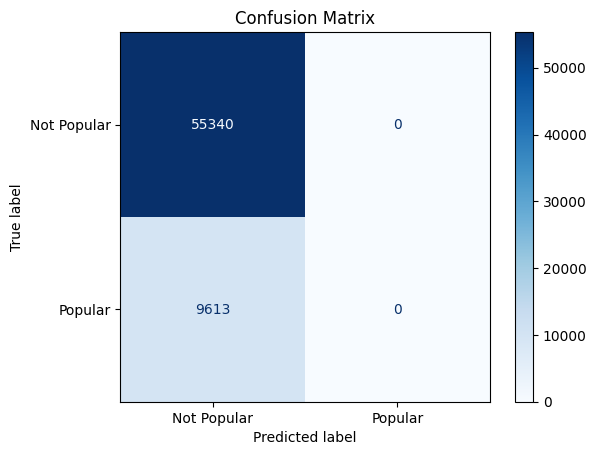

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Popular', 'Popular'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

This result is really bad despite having already addressed the class imbalance. The accuracy is high just because of the class imbalance, but the algorithm isn't good

In [13]:
y_prob = model.predict_proba(X_test)[:,1]

thresholds = [0.1, 0.2, 0.3, 0.4, 0.5]
for threshold in thresholds:
    y_pred_threshold = (y_prob > threshold).astype(int)

    cm = confusion_matrix(y_test, y_pred_threshold)
    print(f"Threshold: {threshold}")
    print(cm)

    f1 = f1_score(y_test, y_pred_threshold)
    print(f"F1 Score: {f1}\n")

    

Threshold: 0.1
[[55340     0]
 [ 9613     0]]
F1 Score: 0.0

Threshold: 0.2
[[55340     0]
 [ 9613     0]]
F1 Score: 0.0

Threshold: 0.3
[[55340     0]
 [ 9613     0]]
F1 Score: 0.0

Threshold: 0.4
[[55340     0]
 [ 9613     0]]
F1 Score: 0.0

Threshold: 0.5
[[55340     0]
 [ 9613     0]]
F1 Score: 0.0



Even adjusting the cofficients, the result doesn't improve at all.

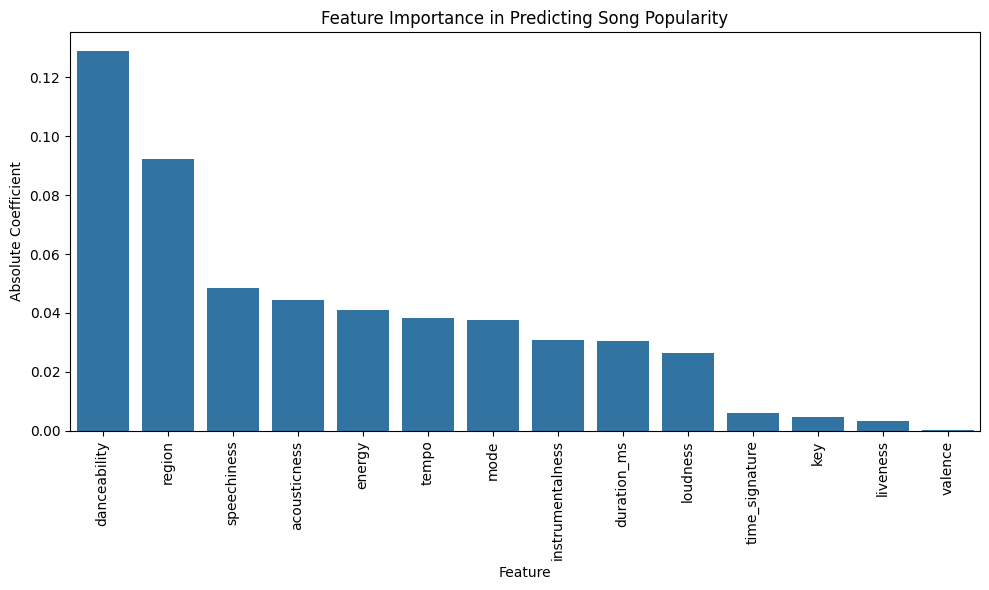

In [19]:
# Get the coefficients
coefficients = model.coef_[0]
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})

# Sort by absolute value of coefficients
feature_importance['Absolute Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Absolute Coefficient', ascending=False)

# Plot feature importance with vertical bars (features on x-axis)
plt.figure(figsize=(10, 6))
sns.barplot(x='Feature', y='Absolute Coefficient', data=feature_importance)
plt.xticks(rotation=90)  # Rotate feature names for better readability
plt.title('Feature Importance in Predicting Song Popularity')
plt.tight_layout()
plt.show()


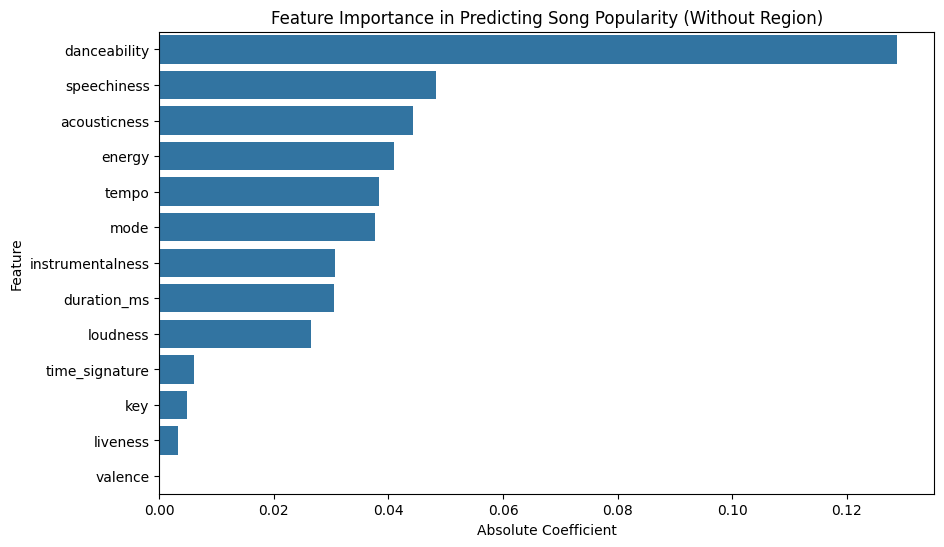

In [18]:

# Remove the 'region' feature from both X.columns and coefficients

filtered_columns = X.columns[X.columns != 'region']
filtered_coefficients = coefficients[X.columns != 'region']

# Create a DataFrame for feature importance
feature_importance = pd.DataFrame({
    'Feature': filtered_columns, 
    'Coefficient': filtered_coefficients
})

# Sort by absolute value of coefficients
feature_importance['Absolute Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Absolute Coefficient', ascending=False)

# Plot feature importance without 'region'
plt.figure(figsize=(10, 6))
sns.barplot(x='Absolute Coefficient', y='Feature', data=feature_importance)
plt.title('Feature Importance in Predicting Song Popularity (Without Region)')
plt.show()


In [87]:
import numpy as np

In [88]:
# Create a dictionary to map region codes to region names
region_names = {
    0: 'Africa',
    1: 'East Asia',
    2: 'Eastern Europe',
    3: 'Latin America',
    4: 'Middle East',
    5: 'North America',
    6: 'Northern Europe',
    7: 'Oceania',
    8: 'South Asia',
    9: 'Southern Europe',
    10: 'Western Europe'
}

# Get the unique regions from your dataset
regions = data['region'].unique()


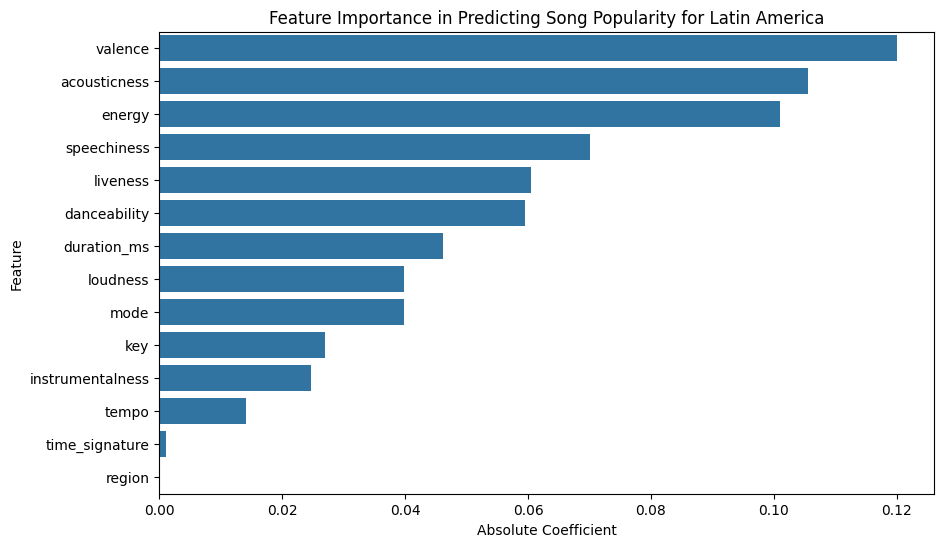

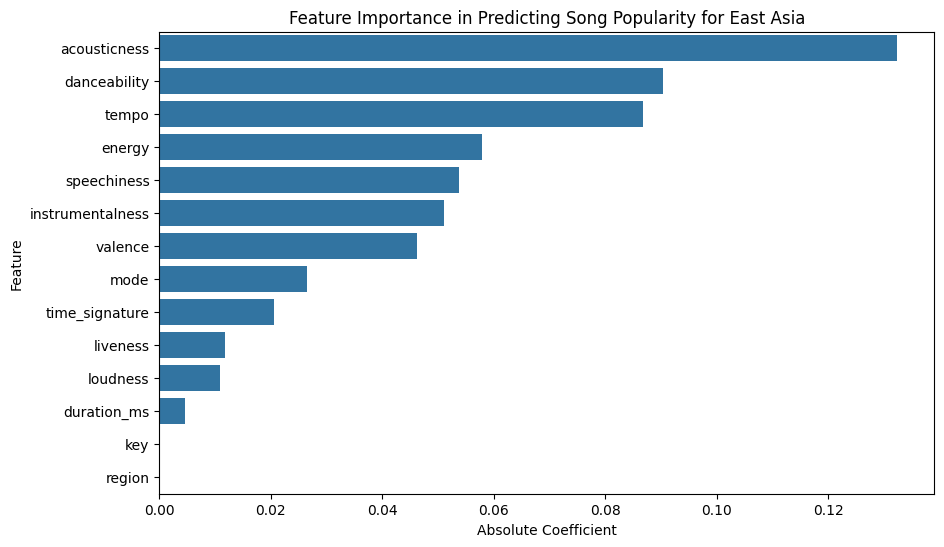

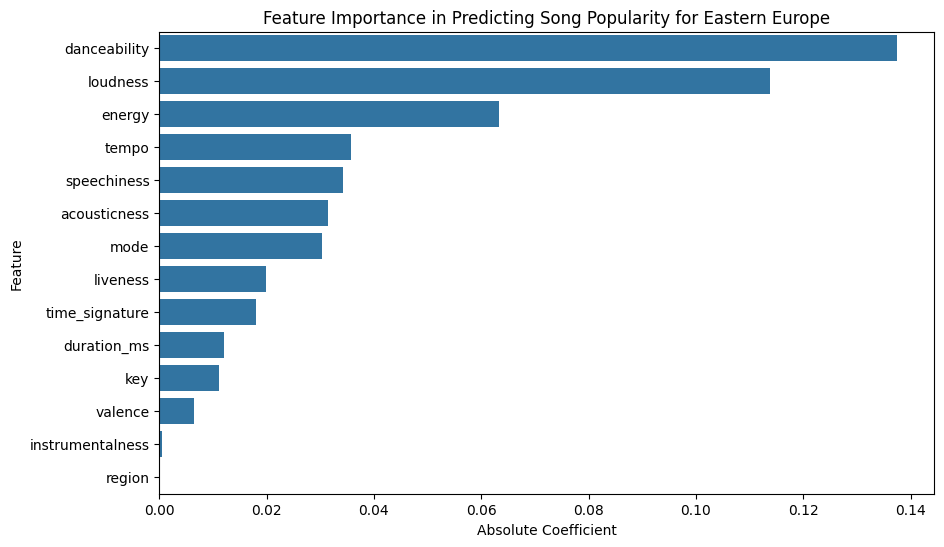

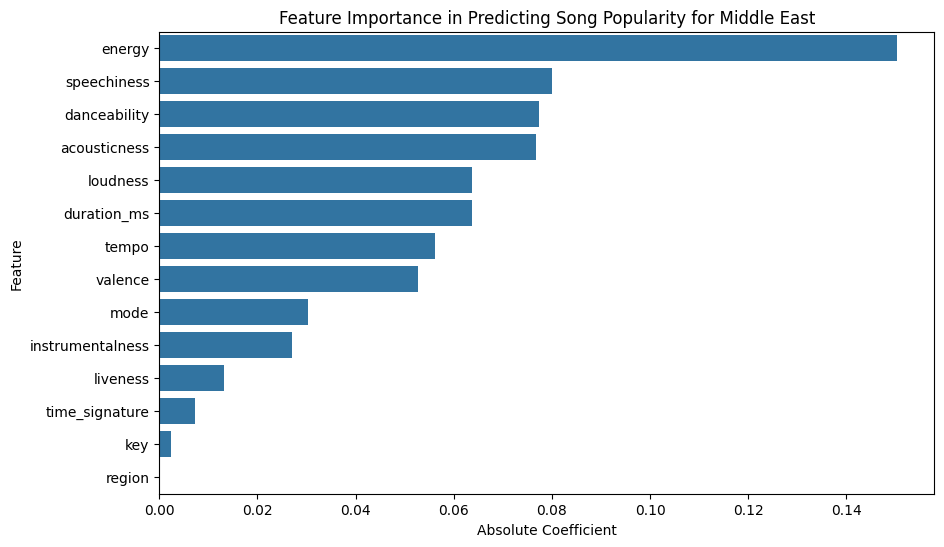

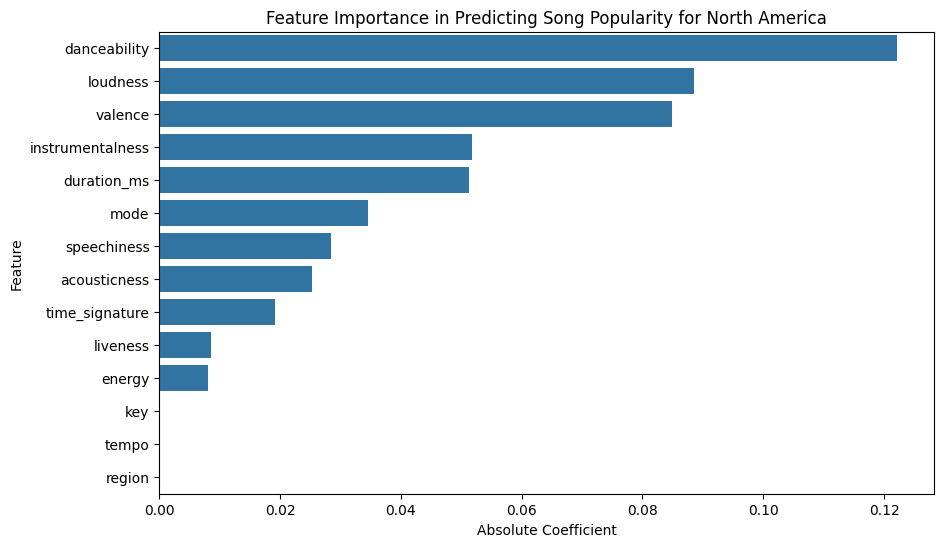

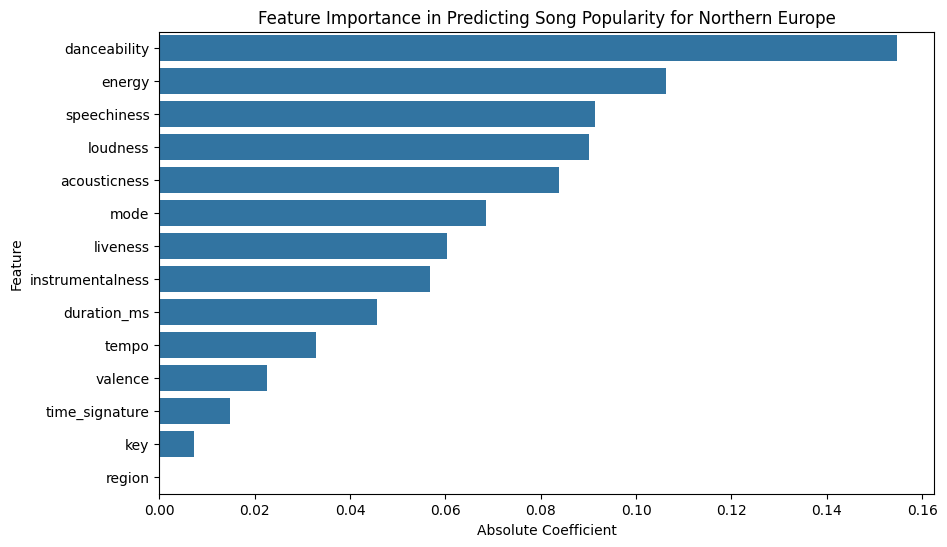

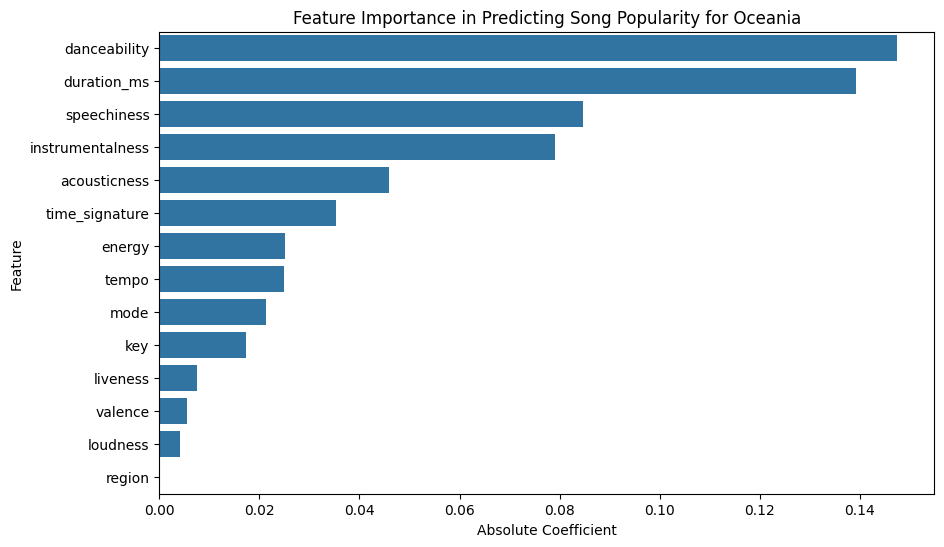

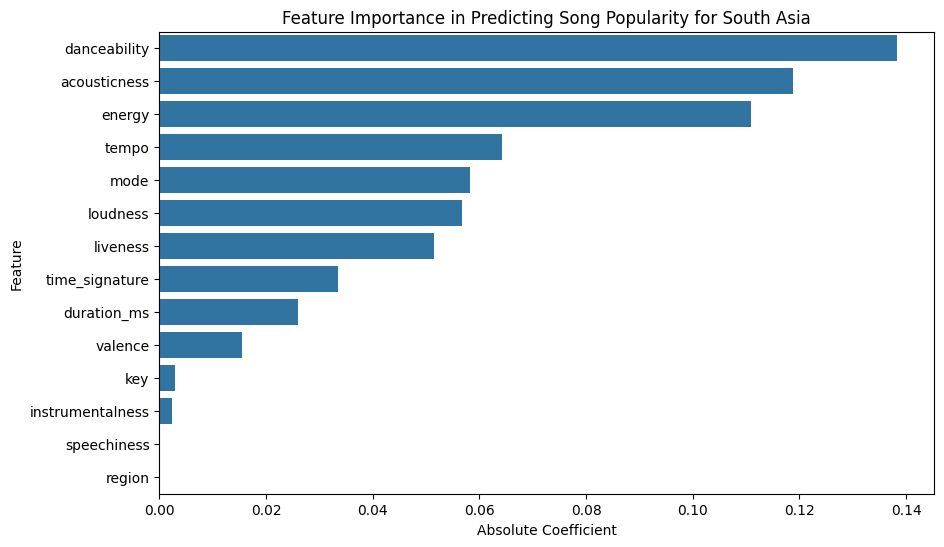

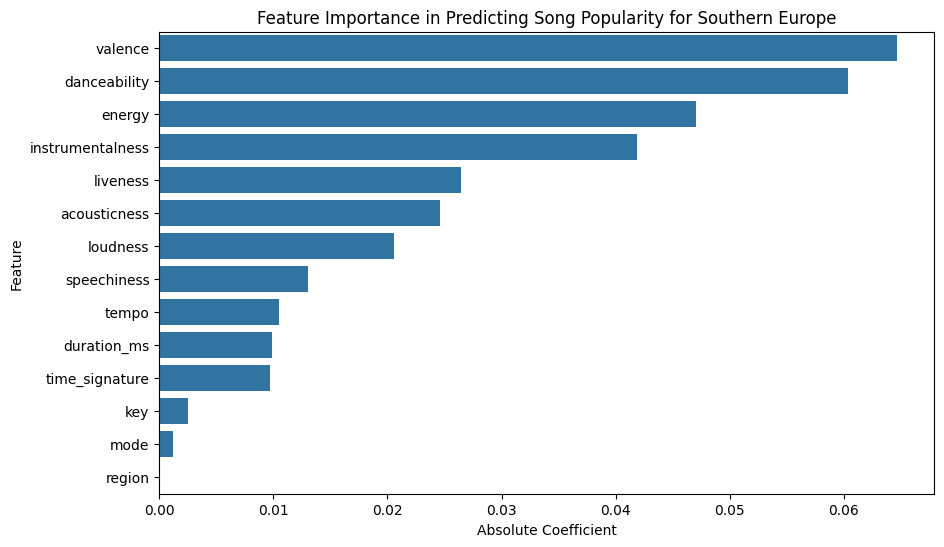

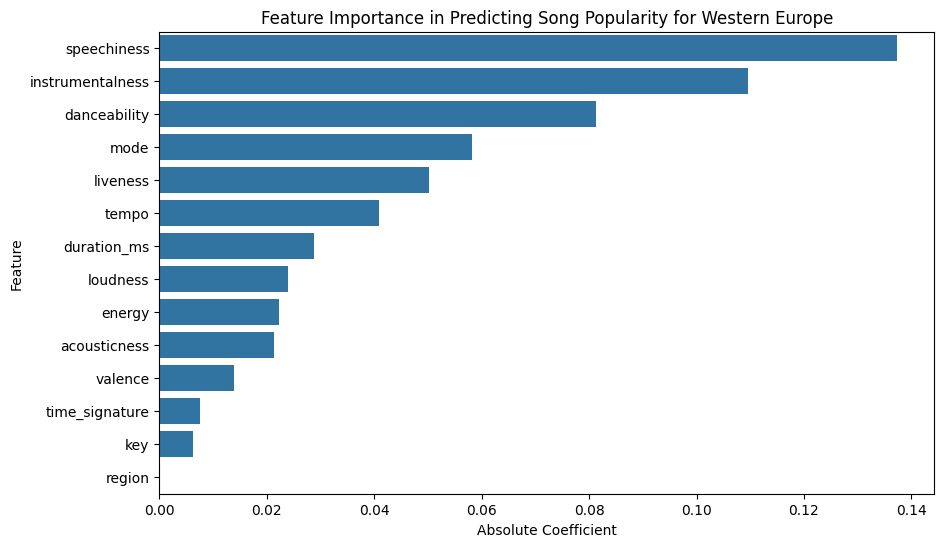

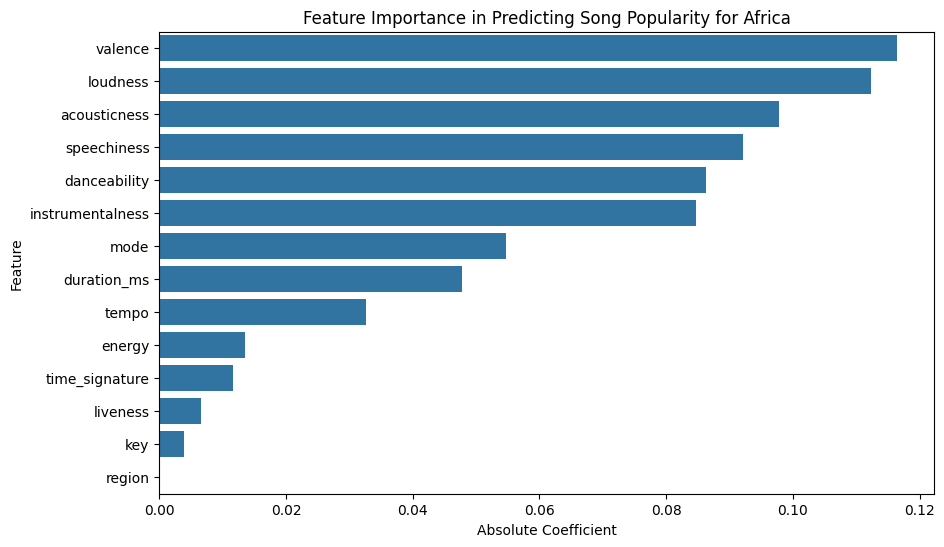

In [89]:
#feature importance for each region seperately
for region in regions:
    region_data = data[data['region'] == region]

    X_region = region_data.drop(['popular'], axis=1)
    y_region = region_data['popular']

    # Scale the features
    scaler = StandardScaler()
    X_region_scaled = scaler.fit_transform(X_region)

    # Train the logistic regression model with scaled data
    model = LogisticRegression(max_iter=2000, class_weight='balanced')
    model.fit(X_region_scaled, y_region)

    # Get the coefficients
    coefficients = model.coef_[0]
    
    # Create a DataFrame for feature importance
    feature_importance = pd.DataFrame({
        'Feature': X_region.columns,
        'Coefficient': coefficients
    })
    
    # Sort by absolute value of coefficients
    feature_importance['Absolute Coefficient'] = feature_importance['Coefficient'].abs()
    feature_importance = feature_importance.sort_values(by='Absolute Coefficient', ascending=False)
    
    # Plot feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Absolute Coefficient', y='Feature', data=feature_importance)
    plt.title(f'Feature Importance in Predicting Song Popularity for {region_names[region]}')
    plt.show()

In [90]:
# Add predictions to the original dataset
data['Predicted Popularity'] = model.predict(X)

# Group by region and analyze the mean of each audio feature
region_analysis = data.groupby('region').mean()

print(region_analysis)

        danceability    energy       key  loudness      mode  speechiness  \
region                                                                      
0           0.686295  0.619734  5.206424 -7.608736  0.507380     0.137555   
1           0.603382  0.629306  5.294207 -6.861704  0.678162     0.079573   
2           0.661498  0.641239  5.287374 -7.342089  0.540551     0.129643   
3           0.663322  0.660444  5.356673 -6.707045  0.592774     0.105519   
4           0.642029  0.611241  5.288157 -7.634013  0.461966     0.104671   
5           0.657891  0.620176  5.185422 -6.990812  0.609833     0.131226   
6           0.642139  0.635878  5.316541 -7.348868  0.562723     0.108689   
7           0.647060  0.630660  5.223630 -7.050239  0.608444     0.115602   
8           0.622576  0.583866  5.239207 -7.393087  0.658991     0.081898   
9           0.649298  0.646239  5.306584 -7.021315  0.563503     0.119060   
10          0.669418  0.642748  5.338206 -7.263375  0.525084     0.145118   

c:\Users\LENOVO\anaconda3\envs\DMML\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [95]:
#define a threshold for selecting "important" features
importance_threshold = 0.1  # Only consider features with importance > 0.1 as important

for region in regions:
    #Filter data for the specific region
    region_data = data[data['region'] == region]
    
    # Prepare features (exclude 'popular') and target ('popular')
    X_region = region_data.drop('popular', axis=1)
    y_region = region_data['popular']
    
    # Check if there are enough samples for this region
    if len(y_region) < 2:  # At least two samples needed to fit the model
        print(f"\nRegion: {region_names[region]} - Not enough data to train the model.")
        continue

    #Train  for this region
    scaler = StandardScaler()
    X_region_scaled = scaler.fit_transform(X_region)

    model = LogisticRegression(max_iter=2000, class_weight='balanced')
    model.fit(X_region_scaled, y_region)
    
    #Extract feature importances
    feature_importance_region = model.coef_[0]

    # Get the important features (those with importance > threshold)
    important_features_indices = np.where(np.abs(feature_importance_region) > importance_threshold)[0]
    important_features = X_region.columns[important_features_indices]

    # Check if there are any important features
    if len(important_features) == 0:
        print(f"\nRegion: {region_names[region]} (Code {region}) - No important features found above the threshold.")
        continue

    #Calculate and display mean values for important features
    region_name = region_names[region]
    print(f"\nRegion: {region_name} (Code {region}) - Important Features and Their Mean Values:")

    for feature in important_features:
        mean_value = region_data[feature].mean()
        print(f"Feature: {feature}, Mean Value: {mean_value:.2f}")



Region: Latin America (Code 3) - Important Features and Their Mean Values:
Feature: energy, Mean Value: 0.66
Feature: acousticness, Mean Value: 0.29
Feature: valence, Mean Value: 0.58

Region: East Asia (Code 1) - Important Features and Their Mean Values:
Feature: acousticness, Mean Value: 0.30

Region: Eastern Europe (Code 2) - Important Features and Their Mean Values:
Feature: danceability, Mean Value: 0.66
Feature: loudness, Mean Value: -7.34

Region: Middle East (Code 4) - Important Features and Their Mean Values:
Feature: energy, Mean Value: 0.61

Region: North America (Code 5) - Important Features and Their Mean Values:
Feature: danceability, Mean Value: 0.66

Region: Northern Europe (Code 6) - Important Features and Their Mean Values:
Feature: danceability, Mean Value: 0.64
Feature: energy, Mean Value: 0.64

Region: Oceania (Code 7) - Important Features and Their Mean Values:
Feature: danceability, Mean Value: 0.65
Feature: duration_ms, Mean Value: 213396.98

Region: South Asia

In [96]:
# Loop through each region and check the importance of danceability
for region in regions:
    region_data = data[data['region'] == region]

    X_region = region_data.drop(['popular'], axis=1)
    y_region = region_data['popular']

    # Scale the features
    scaler = StandardScaler()
    X_region_scaled = scaler.fit_transform(X_region)

    # Train the logistic regression model with scaled data
    model = LogisticRegression(max_iter=2000, class_weight='balanced')
    model.fit(X_region_scaled, y_region)

    # Extract feature importances
    feature_importance_region = model.coef_[0]

    # Get the index of the danceability feature
    feature_names = X_region.columns
    danceability_index = list(feature_names).index('danceability')

    #check if the danceability feature is important
    if feature_importance_region[danceability_index] > importance_threshold:
        region_name = region_names.get(region, f'Region {region}')
        print(f"Danceability is an important feature for {region_name}.")    

Danceability is an important feature for Eastern Europe.
Danceability is an important feature for North America.
Danceability is an important feature for Northern Europe.
Danceability is an important feature for Oceania.
Danceability is an important feature for South Asia.


In [92]:
# Example new song features
new_song_data = {
    'region': 5,
    'danceability': 0.7,
    'energy': 0.8,
    'key': 5,               
    'loudness': -5.0,
    'mode': 1,
    'speechiness': 0.05,
    'acousticness': 0.1,
    'instrumentalness': 0.0,
    'liveness': 0.2,
    'valence': 0.6,
    'tempo': 120,
    'duration_ms': 200000,
    'time_signature': 4
}

# Create a DataFrame
new_song_df = pd.DataFrame([new_song_data])

# Scale the new song data
new_song_scaled = scaler.transform(new_song_df)

# Make prediction
predicted_popularity = model.predict(new_song_scaled)

# Output the prediction
if predicted_popularity[0] == 1:
    print("The new song is predicted to be popular.")
else:
    print("The new song is predicted to be not popular.")


The new song is predicted to be popular.
